# Exercises Day06

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from netgraph import Graph


## Ex01
**Simulated annealing - traveling salesman**



Loading the matrix

In [70]:
cost_matrix = np.loadtxt(open("cost.csv", "rb"), delimiter=",")


Defining the function for problem

In [71]:
cool_scheme1 = lambda k : 1 / np.sqrt(1 + k)
cool_scheme2 = lambda k : -np.log(k + 1)

def objective_func(S:list):
    S = np.append(S, S[0])  
    return cost_matrix[S[:-1], S[1:]].sum()

def prob_annealing(
    S_curr : list,
    S_proposal : list,
    i : int,
    T_func : Callable = cool_scheme1,
    obj_func: Callable = objective_func
    ) -> tuple[float, float, float]:
    """

    """
    T = T_func(i)
    f_curr = obj_func(S_curr)
    f_proposal = obj_func(S_proposal)
    P = np.exp(-(f_proposal - f_curr) / T)
    
    return P, f_curr, f_proposal


MCMC setup

In [72]:
def MCMC_annealing(
    num_iter : int,
    N : int,
    S_0: list = None,
    T_func : Callable = cool_scheme1,
    obj_func: Callable = objective_func,
    seed : int = 42
    ) -> list[list[int]]:
    """

    """
    np.random.seed(seed)
    
    if S_0 is None:
        S_0 = np.random.choice(N, replace=False, size=N)
    

    samples_S = [S_0]
    S_best = S_0
    U_best = objective_func(S_best)
    
    for i in range(num_iter):
        S_curr = samples_S[-1]
        
        # switch indices
        S_proposal = S_curr.copy()
        indx1, indx2 = np.random.choice(N, replace=False, size=2)
        S_proposal[[indx1, indx2]] = S_proposal[[indx2, indx1]]

        
        P, U_curr, U_proposal = prob_annealing(S_curr, S_proposal,i, T_func, obj_func)
     
        if U_proposal <= U_curr:
            samples_S.append(S_proposal)
            
        else:
            accept = np.random.uniform(0,1)

            if accept < P:
                samples_S.append(S_proposal)
            else:
                samples_S.append(S_curr)
        
        if U_proposal < U_best:
            U_best = U_proposal
            S_best = S_proposal
    
    return U_best, S_best, samples_S

In [75]:
NUM_SAMPLES = 10**5
num_locs = cost_matrix.shape[0] # <-- because it is symmetrical
U_best, S_best, samples_S = MCMC_annealing(NUM_SAMPLES, num_locs, T_func=cool_scheme1)

print(U_best)

/var/folders/0k/ps_0pzxs5czcpbh2xf25k20c0000gp/T/ipykernel_28641/3267781057.py:21: RuntimeWarning: overflow encountered in exp
  P = np.exp(-(f_proposal - f_curr) / T)


878.0


Plot

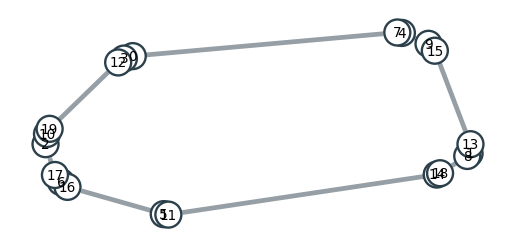

In [76]:

S_indx = np.append(S_best, S_best[0])
edge_lengths = cost_matrix[S_indx[:-1], S_indx[1:]]
edge_lengths /= edge_lengths.sum()

edge_length = {(S_indx[i], S_indx[i+1]): edge_lengths[i] for i in range(len(S_indx)-1)}
edges = list(edge_length.keys())

fig, ax = plt.subplots()
fig.figsize = (40,40)
Graph(edges, node_layout="geometric", node_layout_kwargs=dict(edge_length=edge_length), node_labels=True, ax=ax)
ax.set_aspect("equal")
plt.show()